In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython
import time
import random
import Helper as helper
from Imputer import LRTC_TSpN

plt.rcParams['figure.figsize'] = (10,6)
%matplotlib inline
IPython.display.set_matplotlib_formats('svg')

This notebook gives a toy example to show how to implement LRTC-TSpN (low-rank tensor completion based on truncated tensor norm) on two small-size traffic flow data. Users can adopt this model to any spatial-temporal traffic data. For more detailted discussion about LRTC-TSpN, please see [1]. More details please refer to our GitHub repository [**tensorlib - GitHub**](https://github.com/tongnie/tensorlib).

<div class="alert alert-block alert-info">
<font color="black">
<b>[1]</b> Tong Nie, Guoyang Qin, Jian Sun (2022). <b>Truncated tensor Schatten p-norm based approach for spatiotemporal traffic data imputation with complicated missing patterns</b>. arXiv.2205.09390 <a href="https://arxiv.org/abs/2205.09390" title="PDF"><b>[PDF]</b></a> 
</font>
</div>

## Preparation
### Third-order Tensor Structure

We organize the multivariate traffic time series as a third-order
tensor structure, i.e. $time~intervals×locations~(sensors)×days$. This three-dimensional data structure simultaneously
captures the integrated spatial-temporal information, thus making it more efficient to impute missing values.

### Spatial-temporal traffic sensor data

In this notebook, we conduct data imputation on the following two small subsets of traffic speed and volume datasets, the original data can be found at our GitHub repository. [**tensorlib - GitHub**](https://github.com/tongnie/tensorlib).
- **Guangzhou-small:** This is an urban traffic speed data set which consists of 214 road segments within two months (i.e., 61 days from August 1, 2016 to September 30, 2016) at 10-minute interval, in Guangzhou, China. We only use the speed data with the first 50 locations and the first 15 days. The size is (144 × 50 × 15). 
- **Portland-small:** This data set consists of link volume collected from highways in Portland, which contains 1156 loop detectors within one month at 15-minute interval. Volume data with the first 80 locations and the first 15 days are used. The size is (96 × 80 × 15).

### Complicated missing patterns
Besides the element-wise random missing case, we define three structured fiber mode-$n$ missing scenarios, which are generated through the two-by-two combinations of tensor mode-$n$ fibers. This can be described as: 
- **’Intervals’ mode fiber-like missing (FM-0)**, which illustrates a temporal missing pattern, is caused by adverse weather, breakdown of wireless connections or apparatus maintenance; 
- **’Locations’ mode fiber-like missing (FM-1)**, which denotes a spatial missing pattern, can be explained by lack of electricity for successive sensors or malfunction of Internet Data Center; 
- **’Days’ mode fiber-like missing (FM-2)** illuminates a spatial-temporal mixture missing situation that they are offline (do not operate) at regular time intervals everyday for specific sensors.

Load the Guangzhou speed dataset

In [2]:
#Random missing pattern
speed_tensor = np.load('../Datasets/guangzhou_speed.npy')

random.seed(123)
speed_tensor_lost = helper.generate_tensor_random_missing(speed_tensor,lost_rate=0.5)
tensor_miss_rate = helper.get_missing_rate(speed_tensor_lost)
print(f'Random missing rate of tensor is：{100*tensor_miss_rate:.2f}%')

Random missing rate of tensor is：51.00%


Generate three Fiber-mode missing patterns

In [3]:
#Fiber mode-0 missing
random.seed(123)
speed_tensor_lost_fiber0 = helper.generate_fiber_missing(speed_tensor,lost_rate=0.5,mode=0)

fiber-mode0 missing rate of tensor is：50.93%


In [4]:
#Fiber mode-1 missing
random.seed(123)
speed_tensor_lost_fiber1 = helper.generate_fiber_missing(speed_tensor,lost_rate=0.5,mode=1)

fiber-mode1 missing rate of tensor is：51.00%


In [5]:
#Fiber mode-2 missing
random.seed(123)
speed_tensor_lost_fiber2 = helper.generate_fiber_missing(speed_tensor,lost_rate=0.5,mode=2)

fiber-mode2 missing rate of tensor is：50.89%


TSp_ADMM Iteration:     
 Processing loop 52
 total iterations = 52   error=0.0008558335667463486
LRTC-TSpN imptation MAE = 2.832
LRTC-TSpN imputation RMSE = 4.261


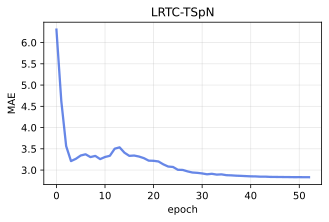

In [6]:
#Data imputation and plot the convergency curve
theta = 0.1
plt.subplots(figsize = (5,3))
it,X_hat,MAE_List_admm,RMSE_List_admm,_ = LRTC_TSpN(speed_tensor,speed_tensor_lost_fiber0,theta =theta,p=0.7,beta=1e-5,incre=0.1,maxiter = 200,show_plot = True)

plt.title('LRTC-TSpN')
plt.grid(alpha=0.3)
ax = plt.gca()
ax.set_axisbelow(True)
lines = ax.lines
for line in lines:
    line.set_linewidth(2.3)
    line.set_color('royalblue')
    line.set_alpha(0.8)

TSp_ADMM Iteration:     
 Processing loop 64
 total iterations = 64   error=0.0008833959353604114
LRTC-TSpN imptation MAE = 2.426
LRTC-TSpN imputation RMSE = 3.476


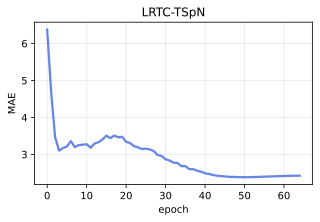

In [7]:
#Data imputation and plot the convergency curve
theta = 0.1
plt.subplots(figsize = (5,3))
it,X_hat,MAE_List_admm,RMSE_List_admm,_ = LRTC_TSpN(speed_tensor,speed_tensor_lost_fiber1,theta =theta,p=0.8,beta=1e-5,incre=0.1,maxiter = 200,show_plot = True)

plt.title('LRTC-TSpN')
plt.grid(alpha=0.3)
ax = plt.gca()
ax.set_axisbelow(True)
lines = ax.lines
for line in lines:
    line.set_linewidth(2.3)
    line.set_color('royalblue')
    line.set_alpha(0.8)

TSp_ADMM Iteration:     
 Processing loop 64
 total iterations = 64   error=0.00099624077043648
LRTC-TSpN imptation MAE = 2.397
LRTC-TSpN imputation RMSE = 3.443


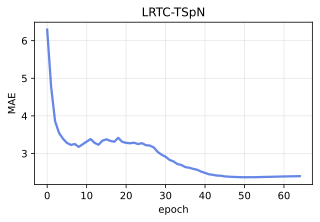

In [8]:
#Data imputation and plot the convergency curve
theta = 0.1
plt.subplots(figsize = (5,3))
it,X_hat,MAE_List_admm,RMSE_List_admm,_ = LRTC_TSpN(speed_tensor,speed_tensor_lost_fiber2,theta =theta,p=0.8,beta=1e-5,incre=0.1,maxiter = 200,show_plot = True)

plt.title('LRTC-TSpN')
plt.grid(alpha=0.3)
ax = plt.gca()
ax.set_axisbelow(True)
lines = ax.lines
for line in lines:
    line.set_linewidth(2.3)
    line.set_color('royalblue')
    line.set_alpha(0.8)

# License

<div class="alert alert-block alert-danger">
<b>This work is released under the MIT license.</b>
</div>